In [ ]:
# seaborn 한글 관련
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

In [127]:
# seaborn 한글 관련
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
'''
서울교통공사_지하철혼잡도정보
서울교통공사 1-8호선 30분 단위 평균 혼잡도로 30분간 지나는 열차들의 평균 혼잡도(정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정) 
서울교통공사 혼잡도 데이터는 조사일자(평일, 토요일, 일요일), 호선, 역번호, 역명, 상하선구분, 30분단위 별 혼잡도 데이터로 구성되어 있습니다.
'''

In [129]:
# 서울교통공사_지하철혼잡도정보_20211231.csv
subway = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/subway_congestion.csv", encoding='cp949')
subway

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,일요일,8,2825,신흥,하선,7.0,3.0,2.2,2.1,...,4.0,2.6,3.2,2.6,3.7,2.4,2.4,1.6,2.2,1.5
1700,1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1701,1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5
1702,1703,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,...,4.7,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8


In [130]:
subway.shape

(1704, 43)

In [131]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1704 non-null   int64  
 1   조사일자    1704 non-null   object 
 2   호선      1704 non-null   int64  
 3   역번호     1704 non-null   int64  
 4   역명      1704 non-null   object 
 5   구분      1704 non-null   object 
 6   5시30분   1704 non-null   float64
 7   6시00분   1704 non-null   float64
 8   6시30분   1704 non-null   float64
 9   7시00분   1704 non-null   float64
 10  7시30분   1704 non-null   float64
 11  8시00분   1704 non-null   float64
 12  8시30분   1704 non-null   float64
 13  9시00분   1704 non-null   float64
 14  9시30분   1704 non-null   float64
 15  10시00분  1704 non-null   float64
 16  10시30분  1704 non-null   float64
 17  11시00분  1704 non-null   float64
 18  11시30분  1704 non-null   float64
 19  12시00분  1704 non-null   float64
 20  12시30분  1704 non-null   float64
 21  13시00분  1704 non-null   float64
 22  

In [132]:
subway.describe()

,연번,호선,역번호,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,...,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,852.500000,5.235915,1645.390845,12.829049,12.454460,12.589847,15.340728,19.757512,27.309096,24.065669,...,24.104695,19.591256,18.273768,18.359624,19.310739,17.816960,19.857570,18.593721,16.009918,10.993310
std,492.046746,2.889140,1171.787868,11.507665,8.893017,10.275193,14.774740,19.332359,26.940089,22.153565,...,16.326942,12.262688,11.036071,11.546144,12.532676,11.869515,14.141485,13.658437,11.925547,9.449757
min,1.000000,1.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,426.750000,3.000000,318.750000,5.600000,6.500000,5.875000,6.275000,7.300000,10.800000,10.800000,...,13.400000,11.300000,10.300000,9.800000,10.000000,9.200000,9.900000,8.800000,7.300000,4.100000
50%,852.500000,5.000000,2531.500000,9.700000,10.300000,9.700000,10.150000,12.650000,17.700000,16.600000,...,21.400000,17.700000,16.900000,16.400000,17.400000,15.900000,16.850000,14.900000,13.000000,8.700000
75%,1278.250000,7.000000,2646.250000,16.500000,16.100000,15.925000,18.500000,24.800000,33.025000,28.800000,...,30.425000,24.900000,24.200000,25.000000,26.100000,24.100000,27.100000,25.825000,22.600000,15.300000
max,1704.000000,15.000000,2827.000000,89.000000,56.500000,66.800000,93.400000,107.900000,150.800000,149.400000,...,94.500000,70.400000,61.700000,63.800000,71.900000,78.600000,95.300000,91.800000,79.500000,72.500000


In [133]:
subway.value_counts(['호선'])

호선
7     306
5     294
2     258
6     234
3     204
4     156
8     102
1      60
15     42
13     24
14     24
dtype: int64

In [134]:
line2_all = subway.query('호선==2')
line2 = line2_all.query('조사일자 == "평일" & 구분 == "내선"')
line2

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
20,21,평일,2,201,시청,내선,15.3,18.8,22.4,36.7,...,26.6,16.8,15.3,15.4,20.6,23.4,30.1,36.3,26.9,14.5
22,23,평일,2,202,을지로입구,내선,10.8,15.4,16.3,24.6,...,34.9,20.9,20.8,18.7,25.2,28.0,35.4,40.0,29.4,12.5
24,25,평일,2,203,을지로3가,내선,10.6,14.9,15.3,23.0,...,35.6,22.3,20.9,18.8,26.4,29.3,35.9,40.6,29.9,28.2
26,27,평일,2,204,을지로4가,내선,12.3,13.0,14.6,21.6,...,40.0,23.8,21.7,20.2,27.9,30.5,37.4,49.0,28.1,28.4
28,29,평일,2,205,동대문역사문화공원,내선,17.6,18.1,21.2,30.2,...,39.1,22.8,20.0,20.7,25.1,30.3,34.5,45.4,25.7,25.1
30,31,평일,2,206,신당,내선,15.7,21.8,21.8,29.4,...,37.8,22.7,19.9,19.7,22.8,29.0,27.2,50.2,27.8,22.4
32,33,평일,2,207,상왕십리,내선,17.5,22.5,22.3,30.9,...,37.6,21.7,19.6,18.6,22.2,27.8,26.1,47.6,26.1,20.3
34,35,평일,2,208,왕십리,내선,15.3,18.6,19.4,23.7,...,26.0,15.4,12.8,12.9,15.1,17.7,19.1,32.0,16.5,18.6
36,37,평일,2,209,한양대,내선,15.2,17.4,18.8,21.6,...,26.5,15.9,14.0,10.9,16.1,17.8,19.2,32.1,16.6,18.4
38,39,평일,2,210,뚝섬,내선,14.6,16.0,17.3,20.7,...,29.3,17.7,14.2,12.3,17.5,19.3,20.5,33.3,17.0,17.6


In [135]:
line2_2 = line2_all.query('조사일자 == "평일" & 구분 == "외선"')
line2_2

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
21,22,평일,2,201,시청,외선,9.5,15.6,9.9,16.3,...,42.1,33.6,34.6,33.0,30.4,29.5,46.4,43.7,34.5,29.7
23,24,평일,2,202,을지로입구,외선,7.6,17.0,11.3,18.7,...,38.1,30.7,32.3,28.4,26.9,26.7,45.4,40.0,31.6,28.0
25,26,평일,2,203,을지로3가,외선,12.1,19.5,13.7,25.3,...,31.1,24.9,23.9,22.9,21.3,21.8,36.7,33.4,25.0,25.8
27,28,평일,2,204,을지로4가,외선,13.1,21.6,15.1,31.7,...,29.3,22.7,23.2,21.2,19.4,19.9,32.4,31.3,21.2,21.2
29,30,평일,2,205,동대문역사문화공원,외선,13.6,21.3,16.2,37.3,...,26.9,21.8,22.8,19.7,18.9,19.5,31.5,31.2,21.1,16.2
31,32,평일,2,206,신당,외선,17.6,17.3,17.1,40.6,...,36.5,30.8,31.3,26.2,25.6,25.0,40.3,41.1,29.6,20.1
33,34,평일,2,207,상왕십리,외선,15.8,17.4,15.5,37.8,...,39.5,31.3,32.4,28.7,26.4,26.9,40.2,40.3,39.7,13.4
35,36,평일,2,208,왕십리,외선,14.3,16.3,14.4,35.4,...,41.7,31.7,32.8,28.7,26.9,32.5,37.5,42.1,41.2,15.0
37,38,평일,2,209,한양대,외선,10.0,10.1,11.1,25.2,...,34.4,25.2,27.8,24.4,24.2,25.6,30.6,34.5,34.4,12.1
39,40,평일,2,210,뚝섬,외선,7.7,12.2,11.2,25.0,...,33.2,23.0,26.5,22.7,23.9,24.4,33.3,29.1,33.1,11.8


In [136]:
# 평일 오전 8시, 2호선에서 가장 복잡한 지하철역 순위 (내/외선)
line2_0800 = line2_all.sort_values(['8시00분'],ascending=False)
line2_0800[['호선','역명','8시00분']].head(10)

,호선,역명,8시00분
71,2,사당,135.6
75,2,서울대입구,133.5
73,2,낙성대,131.3
69,2,방배,126.3
67,2,서초,120.4
77,2,봉천,116.0
86,2,신도림,113.7
65,2,교대,110.8
88,2,문래,107.8
79,2,신림,106.9


In [137]:
# 평일 오전 8시, 2호선에서 가장 복잡한 지하철역 순위 (내선순환)
line2_0800 = line2.sort_values(['8시00분'],ascending=False)
line2_0800[['호선','역명','8시00분']].head(10)

,호선,역명,8시00분
86,2,신도림,113.7
88,2,문래,107.8
92,2,당산,102.9
90,2,영등포구청,102.9
102,2,아현,102.1
104,2,충정로,100.2
98,2,신촌(지하),99.4
100,2,이대,99.0
96,2,홍대입구,98.8
94,2,합정,93.5


In [138]:
# 평일 오전 8시, 2호선에서 가장 복잡한 지하철역 순위 (외선순환)
line2_0800 = line2_2.sort_values(['8시00분'],ascending=False)
line2_0800[['호선','역명','8시00분']].head(10)

,호선,역명,8시00분
71,2,사당,135.6
75,2,서울대입구,133.5
73,2,낙성대,131.3
69,2,방배,126.3
67,2,서초,120.4
77,2,봉천,116.0
65,2,교대,110.8
79,2,신림,106.9
63,2,강남,93.2
85,2,대림,85.9


In [139]:
# 평일 오후 6시30분, 2호선에서 가장 복잡한 지하철역 순위 (내/외선)
line2_1830 = line2_all.sort_values(['18시30분'],ascending=False)
line2_1830[['호선','역명','18시30분']].head(10)

,호선,역명,18시30분
68,2,방배,125.9
70,2,사당,119.6
66,2,서초,117.0
64,2,교대,114.3
72,2,낙성대,112.1
62,2,강남,104.5
74,2,서울대입구,97.6
60,2,역삼,95.4
76,2,봉천,90.8
82,2,구로디지털단지,85.4


[(21.0, 40.0)]

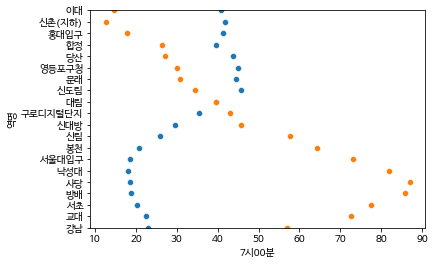

In [140]:
# 평일 오전 7시, 2호선(내선) [강남~이대] 사이의 혼잡도의 산점도 (파랑)
sns.scatterplot(data=line2, x='7시00분', y='역명')\
  .set(ylim=['강남','이대'])
# 평일 오전 7시, 2호선(외선) [강남~이대] 사이의 혼잡도의 산점도 (노랑)
sns.scatterplot(data=line2_2, x='7시00분', y='역명')\
  .set(ylim=['강남','이대'])

[(21.0, 40.0)]

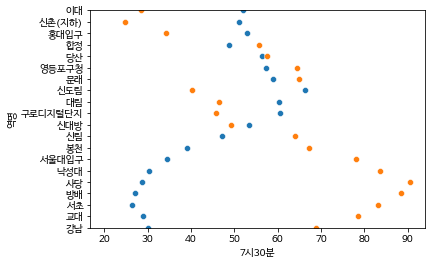

In [141]:
# 평일 오전 7시30분, 2호선(내/외선) [강남~이대] 사이의 혼잡도의 산점도
sns.scatterplot(data=line2, x='7시30분', y='역명')\
  .set(ylim=['강남','이대'])
sns.scatterplot(data=line2_2, x='7시30분', y='역명')\
  .set(ylim=['강남','이대'])

[(21.0, 40.0)]

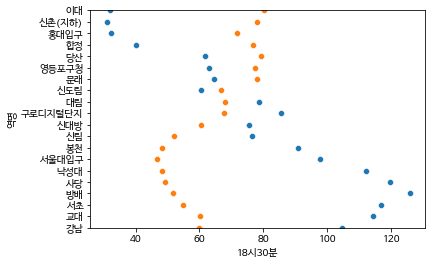

In [142]:
# 평일 오후 6시30분, 2호선(내/외선) [강남~이대] 사이의 혼잡도의 산점도
sns.scatterplot(data=line2, x='18시30분', y='역명')\
  .set(ylim=['강남','이대'])
sns.scatterplot(data=line2_2, x='18시30분', y='역명')\
  .set(ylim=['강남','이대'])

[(21.0, 40.0)]

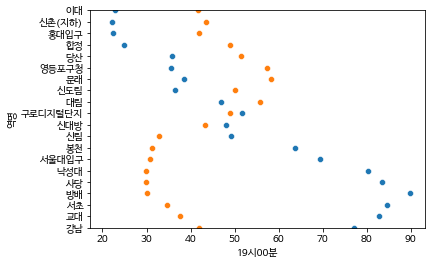

In [143]:
# 평일 오후 7시00분, 2호선(내/외선) [강남~이대] 사이의 혼잡도의 산점도
sns.scatterplot(data=line2, x='19시00분', y='역명')\
  .set(ylim=['강남','이대'])
sns.scatterplot(data=line2_2, x='19시00분', y='역명')\
  .set(ylim=['강남','이대'])

In [144]:
# sns.lineplot(data=line2, x='')

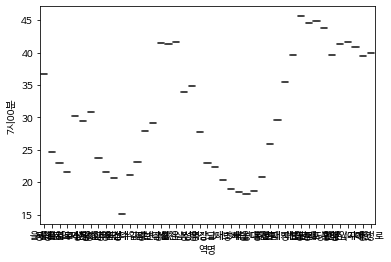

In [145]:
sns.boxplot(data=line2, x='역명', y='7시00분')

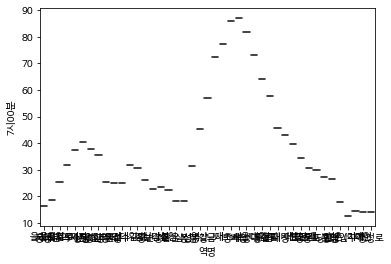

In [146]:
sns.boxplot(data=line2_2, x='역명', y='7시00분')

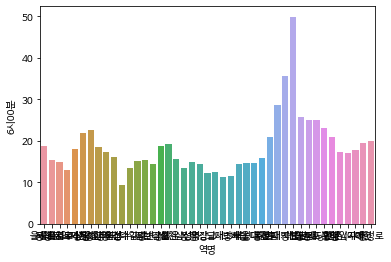

In [147]:
sns.barplot(data=line2, x='역명', y='6시00분')